# Cryptocurrency Liquidity Prediction for Market Stability


## Loading The Dataset

In [ ]:
import pandas as pd

# Load both CSV files
df1 = pd.read_csv('/content/coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('/content/coin_gecko_2022-03-17.csv')



In [ ]:
df1.shape

(500, 9)

In [ ]:
df2.shape

(500, 9)

In [ ]:
# Combine the dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)

# Display the shape and preview
print("Combined shape:", combined_df.shape)
print(combined_df.head())


Combined shape: (1000, 9)
       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   

        mkt_cap        date  
0  7.709915e+11  2022-03-16  
1  3.271044e+11  2022-03-16  
2  7.996516e+10  2022-03-16  
3  6.404382e+10  2022-03-16  
4  5.222214e+10  2022-03-16  


# Create The Target Variable

In [ ]:
# Create liquidity ratio
combined_df['liquidity_ratio'] = combined_df['24h_volume'] / combined_df['mkt_cap']

In [ ]:
print(combined_df.head())


       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   

        mkt_cap        date  liquidity_ratio  
0  7.709915e+11  2022-03-16         0.045903  
1  3.271044e+11  2022-03-16         0.060374  
2  7.996516e+10  2022-03-16         0.724503  
3  6.404382e+10  2022-03-16         0.021795  
4  5.222214e+10  2022-03-16         0.074150  


In [ ]:
combined_df.dtypes

,0
coin,object
symbol,object
price,float64
1h,float64
24h,float64
7d,float64
24h_volume,float64
mkt_cap,float64
date,object
liquidity_ratio,float64


In [ ]:
import numpy as np
np.mean(combined_df['liquidity_ratio'])


np.float64(0.10374291951728723)

In [ ]:
combined_df['liquidity_ratio']

,liquidity_ratio
0,0.045903
1,0.060374
2,0.724503
3,0.021795
4,0.074150
...,...
995,0.043719
996,0.005408
997,0.201198
998,0.139464


In [ ]:
print("Max:", combined_df['liquidity_ratio'].max())
print("Min:", combined_df['liquidity_ratio'].min())


Max: 5.9485448576620605
Min: 0.0


## Data Preprocessing

In [ ]:
combined_df['symbol'].value_counts()



,count
symbol,
FEG,4
TIME,4
RUNE,4
DEP,2
DUSK,2
...,...
CDT,1
MAPS,1
NTVRK,1


In [ ]:
combined_df['symbol'].unique()

array(['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'XRP', 'LUNA', 'SOL', 'ADA',
       'DOT', 'AVAX', 'BUSD', 'DOGE', 'UST', 'SHIB', 'WBTC', 'CRO',
       'MATIC', 'DAI', 'ATOM', 'LTC', 'STETH', 'NEAR', 'LINK', 'TRX',
       'FTT', 'BCH', 'LEO', 'OKB', 'ALGO', 'XLM', 'UNI', 'HBAR', 'AXS',
       'MANA', 'ETC', 'EGLD', 'SAND', 'ICP', 'XMR', 'CETH', 'VET', 'FTM',
       'FIL', 'OSMO', 'KLAY', 'FRAX', 'WAVES', 'THETA', 'MIM', 'GRT',
       'XTZ', 'CUSDC', 'HNT', 'RUNE', 'EOS', 'OMI', 'MIOTA', 'CDAI',
       'FLOW', 'TFUEL', 'AAVE', 'ZEC', 'MKR', 'JUNO', 'GALA', 'BTT', 'AR',
       'HBTC', 'CAKE', 'QNT', 'ONE', 'XEC', 'BSV', 'NEO', 'TUSD', 'HT',
       'KCS', 'CEL', 'STX', 'HEART', 'ENJ', 'BAT', 'NEXO', 'AMP', 'XRD',
       'KSM', 'CELO', 'KDA', 'CHZ', 'DASH', 'FXS', 'USDP', 'BIT', 'GT',
       'CVX', 'SNX', 'XIDO', 'LRC', 'XEM', 'ANC', 'ROSE', 'CRV', 'DCR',
       'CUSDT', 'SCRT', 'LN', 'MINA', 'HOT', 'COMP', 'IOTX', 'KUB',
       'USDN', 'YFI', 'NXM', 'XDC', '1INCH', 'WAXP', 'SLP', 'QTUM',
    

In [ ]:
combined_df['coin'].value_counts()

,count
coin,
Oxygen,2
Bitcoin,2
Ethereum,2
Tether,2
Aave [OLD],2
...,...
Blox,1
MAPS,1
Netvrk,1


we have 503 unique counts.and the highest is 2  and lowest is 1 .so these colums are useful for us even to do the analysis as we have only less no.of data

In [ ]:
# Drop non-numeric identifiers as they are not important in this dataset
combined_df.drop(['coin', 'symbol'], axis=1, inplace=True)


In [ ]:
combined_df.shape

(1000, 8)

In [ ]:
combined_df.dtypes

,0
price,float64
1h,float64
24h,float64
7d,float64
24h_volume,float64
mkt_cap,float64
date,object
liquidity_ratio,float64


In [ ]:
combined_df['date'] = pd.to_datetime(combined_df['date'])


In [ ]:
combined_df.dtypes

,0
price,float64
1h,float64
24h,float64
7d,float64
24h_volume,float64
mkt_cap,float64
date,datetime64[ns]
liquidity_ratio,float64


In [ ]:
combined_df['day'] = combined_df['date'].dt.day
combined_df['month'] = combined_df['date'].dt.month
combined_df['weekday'] = combined_df['date'].dt.weekday
combined_df['year'] = combined_df['date'].dt.year



In [ ]:
combined_df

,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,day,month,weekday,year
0,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,0.045903,16,3,2,2022
1,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,0.060374,16,3,2,2022
2,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,0.724503,16,3,2,2022
3,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,0.021795,16,3,2,2022
4,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,0.074150,16,3,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17,0.043719,17,3,3,2022
996,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17,0.005408,17,3,3,2022
997,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17,0.201198,17,3,3,2022
998,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17,0.139464,17,3,3,2022


In [ ]:
combined_df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,day,month,weekday,year
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03,1000,993.000000,1000.00000,1000.0,1000.00000,1000.0
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09,2022-03-16 12:00:00,0.103743,16.50000,3.0,2.50000,2022.0
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00,0.000000,16.00000,3.0,2.00000,2022.0
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08,2022-03-16 00:00:00,0.008774,16.00000,3.0,2.00000,2022.0
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08,2022-03-16 12:00:00,0.033798,16.50000,3.0,2.50000,2022.0
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08,2022-03-17 00:00:00,0.088332,17.00000,3.0,3.00000,2022.0
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11,2022-03-17 00:00:00,5.948545,17.00000,3.0,3.00000,2022.0
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10,NaN,0.366932,0.50025,0.0,0.50025,0.0


In [ ]:
print("Unique years:", combined_df['year'].unique())
print("Unique months:", combined_df['month'].unique())
print("Unique days:", combined_df['day'].unique())
print("Unique weekdays:", combined_df['weekday'].unique())
print("Unique dates:", combined_df['date'].unique())


Unique years: [2022]
Unique months: [3]
Unique days: [16 17]
Unique weekdays: [2 3]
Unique dates: <DatetimeArray>
['2022-03-16 00:00:00', '2022-03-17 00:00:00']
Length: 2, dtype: datetime64[ns]


During preprocessing, we extracted time-based features from the date column, including year, month, day, and weekday. However, upon inspection, it was found that:

The dataset only spans two consecutive dates: 2022-03-16 and 2022-03-17.

As a result, the extracted time features had very limited variability:

year had only one unique value (2022)

month had only one value (3)

day had two values (16, 17)

weekday had two values (Wednesday, Thursday)

Given this lack of variation, these features do not provide meaningful information for predicting the target variable (liquidity_ratio). Including them would likely introduce noise rather than improving model performance.

 Final Decision:
All extracted time-based features (year, month, day, weekday) were dropped from the dataset.

The raw date column was retained only for reference or future analysis but not used in the model training process.



In [ ]:
combined_df.drop(['year', 'month', 'day', 'weekday','date'], axis=1, inplace=True)


In [ ]:
combined_df

,price,1h,24h,7d,24h_volume,mkt_cap,liquidity_ratio
0,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,0.045903
1,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,0.060374
2,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,0.724503
3,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,0.021795
4,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,0.074150
...,...,...,...,...,...,...,...
995,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,0.043719
996,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,0.005408
997,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,0.201198
998,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,0.139464


In [ ]:
combined_df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,liquidity_ratio
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03,993.000000
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09,0.103743
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10,0.366932
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,0.000000
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08,0.008774
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08,0.033798
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08,0.088332
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11,5.948545


In [ ]:
combined_df.corr()

,price,1h,24h,7d,24h_volume,mkt_cap,liquidity_ratio
price,1.000000,0.001832,-0.005455,0.016843,0.184038,0.366709,-0.028418
1h,0.001832,1.000000,0.436889,0.132341,-0.006421,0.003880,0.018234
24h,-0.005455,0.436889,1.000000,0.479752,-0.009329,-0.007842,0.214051
7d,0.016843,0.132341,0.479752,1.000000,0.015566,-0.001126,0.440560
24h_volume,0.184038,-0.006421,-0.009329,0.015566,1.000000,0.599778,0.079588
mkt_cap,0.366709,0.003880,-0.007842,-0.001126,0.599778,1.000000,-0.007357
liquidity_ratio,-0.028418,0.018234,0.214051,0.440560,0.079588,-0.007357,1.000000


In [ ]:
combined_df.isnull().sum()

,0
price,0
1h,7
24h,7
7d,8
24h_volume,7
mkt_cap,0
liquidity_ratio,7


In [ ]:
combined_df.shape

(1000, 7)

In [ ]:
combined_df.dropna(inplace=True)



In [ ]:
df = combined_df.dropna()


## EDA

In [ ]:
df

,price,1h,24h,7d,24h_volume,mkt_cap,liquidity_ratio
0,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,0.045903
1,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,0.060374
2,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,0.724503
3,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,0.021795
4,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,0.074150
...,...,...,...,...,...,...,...
995,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,0.043719
996,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,0.005408
997,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,0.201198
998,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,0.139464


In [ ]:
df.shape

(992, 7)

less than 1% of data.so no issues to drop it

In [ ]:
df.isnull().sum()

,0
price,0
1h,0
24h,0
7d,0
24h_volume,0
mkt_cap,0
liquidity_ratio,0


In [ ]:
print("Shape:", df.shape)
print("\nSample Rows:\n", df.head())


Shape: (992, 7)

Sample Rows:
           price     1h    24h     7d    24h_volume       mkt_cap  \
0  40859.460000  0.022  0.030  0.055  3.539076e+10  7.709915e+11   
1   2744.410000  0.024  0.034  0.065  1.974870e+10  3.271044e+11   
2      1.000000 -0.001 -0.001  0.000  5.793497e+10  7.996516e+10   
3    383.430000  0.018  0.028  0.004  1.395854e+09  6.404382e+10   
4      0.999874 -0.001  0.000 -0.000  3.872274e+09  5.222214e+10   

   liquidity_ratio  
0         0.045903  
1         0.060374  
2         0.724503  
3         0.021795  
4         0.074150  


In [ ]:
print("\nSummary Statistics:\n")
print(df.describe())



Summary Statistics:

              price          1h         24h          7d    24h_volume  \
count  9.920000e+02  992.000000  992.000000  992.000000  9.920000e+02   
mean   6.200521e+02    0.009682    0.024018    0.023558  2.884638e+08   
std    4.421998e+03    0.026917    0.058668    0.229781  2.771176e+09   
min    1.484000e-09   -0.704000   -0.646000   -0.558000  0.000000e+00   
25%    1.940547e-01    0.001000    0.001000   -0.041000  1.764198e+06   
50%    1.095000e+00    0.006000    0.016000   -0.000500  8.328741e+06   
75%    6.955000e+00    0.019000    0.035000    0.037000  3.947222e+07   
max    4.121727e+04    0.095000    0.577000    4.608000  5.793497e+10   

            mkt_cap  liquidity_ratio  
count  9.920000e+02       992.000000  
mean   3.783951e+09         0.102415  
std    3.818970e+10         0.364722  
min    6.577043e+07         0.000000  
25%    1.158501e+08         0.008759  
50%    2.131953e+08         0.033738  
75%    5.972493e+08         0.087053  
max    7

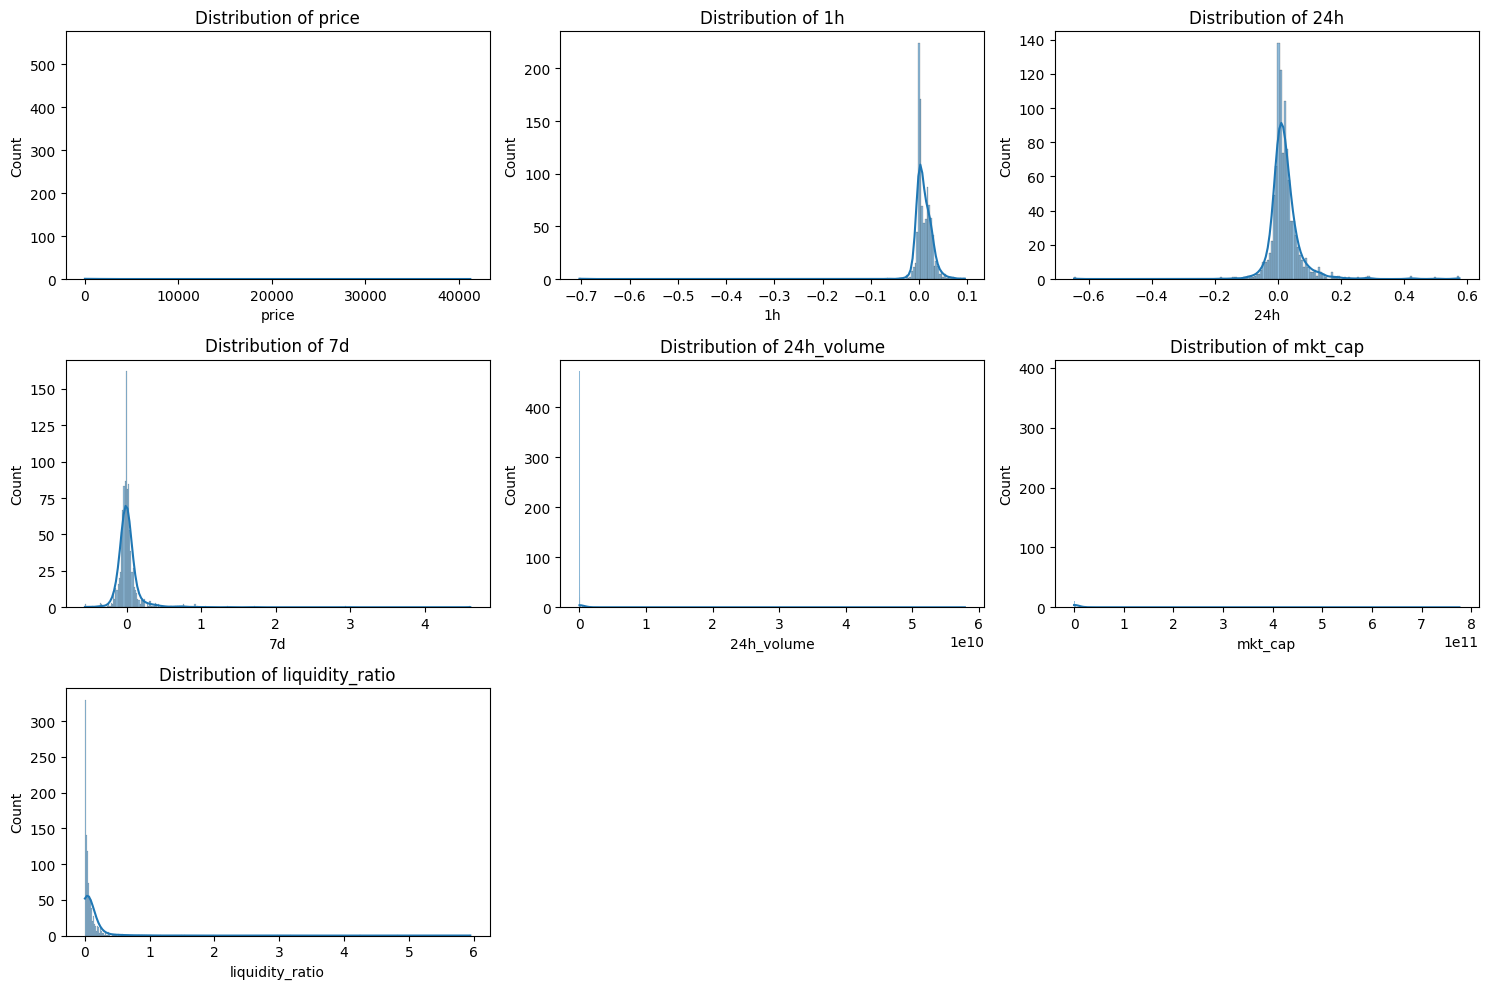

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_ratio']):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



From the histograms of key numeric columns (price, 1h, 24h, 7d, 24h_volume, mkt_cap, liquidity_ratio):

Highly Skewed Distributions:

price, 24h_volume, mkt_cap, and liquidity_ratio are right-skewed with extreme outliers.

Most coins have low values, with a few dominating coins having very large market caps and volumes.

This indicates the need for feature scaling or transformation before modeling.

Percentage Change Features (1h, 24h, 7d):

These are tightly clustered around zero, reflecting minimal percentage price changes over short time windows for most coins.

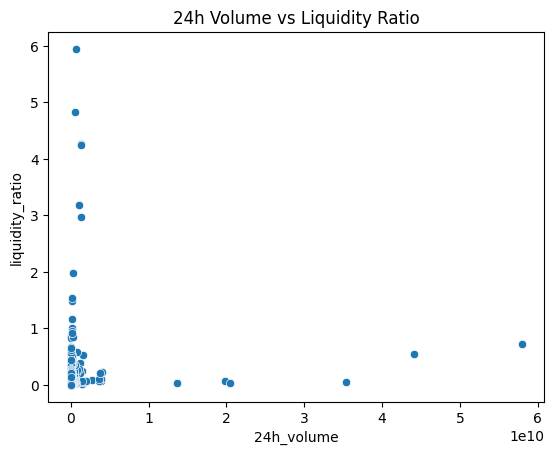

In [ ]:
sns.scatterplot(data=df, x='24h_volume', y='liquidity_ratio')
plt.title("24h Volume vs Liquidity Ratio")
plt.show()


The relationship is non-linear and inverse.

Most coins with very high liquidity ratios have relatively low 24h trading volume, which is counterintuitive.

A few coins with massive trading volume show moderate liquidity, suggesting:

Liquidity ratio might be influenced not just by volume, but by market cap and volatility too.

Outliers or anomalies might be present in low-volume but high-liquidity cases.



## Outlier Detecetion

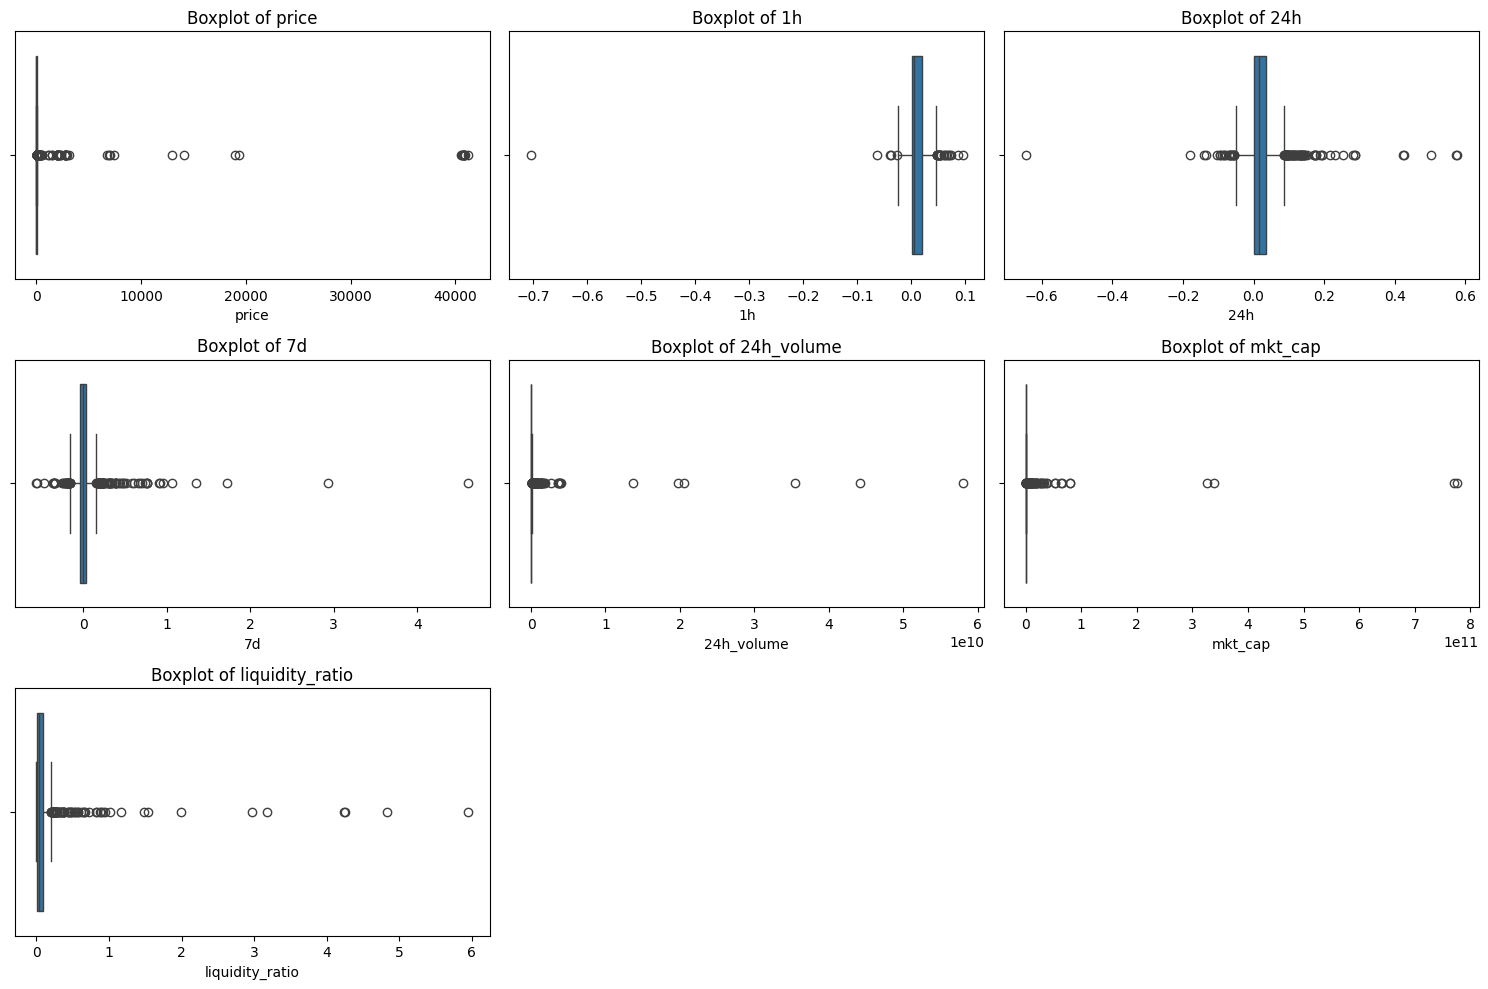

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_ratio']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
numeric_cols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_ratio']
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

# Check for outliers in all numeric columns
outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_summary[col] = len(outliers)

# Display summary
print("Outlier count per column:")
for k, v in outlier_summary.items():
    print(f"{k}: {v}")


Outlier count per column:
price: 188
1h: 26
24h: 91
7d: 104
24h_volume: 146
mkt_cap: 161
liquidity_ratio: 86


In [ ]:
import numpy as np

# Columns to apply log transformation on
log_cols = ['price', '24h_volume', 'mkt_cap', 'liquidity_ratio']

# Apply log1p (log(x + 1)) to handle zeros safely
for col in log_cols:
    df[f'{col}_log'] = np.log1p(df[col])


In [ ]:
numeric_cols = ['1h', '24h', '7d', 'price_log', '24h_volume_log', 'mkt_cap_log', 'liquidity_ratio_log']
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

# Check for outliers in all numeric columns
outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_summary[col] = len(outliers)

# Display summary
print("Outlier count per column:")
for k, v in outlier_summary.items():
    print(f"{k}: {v}")

Outlier count per column:
1h: 26
24h: 91
7d: 104
price_log: 69
24h_volume_log: 28
mkt_cap_log: 44
liquidity_ratio_log: 76


In [ ]:
df.columns

Index(['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_ratio',
       'price_log', '24h_volume_log', 'mkt_cap_log', 'liquidity_ratio_log'],
      dtype='object')

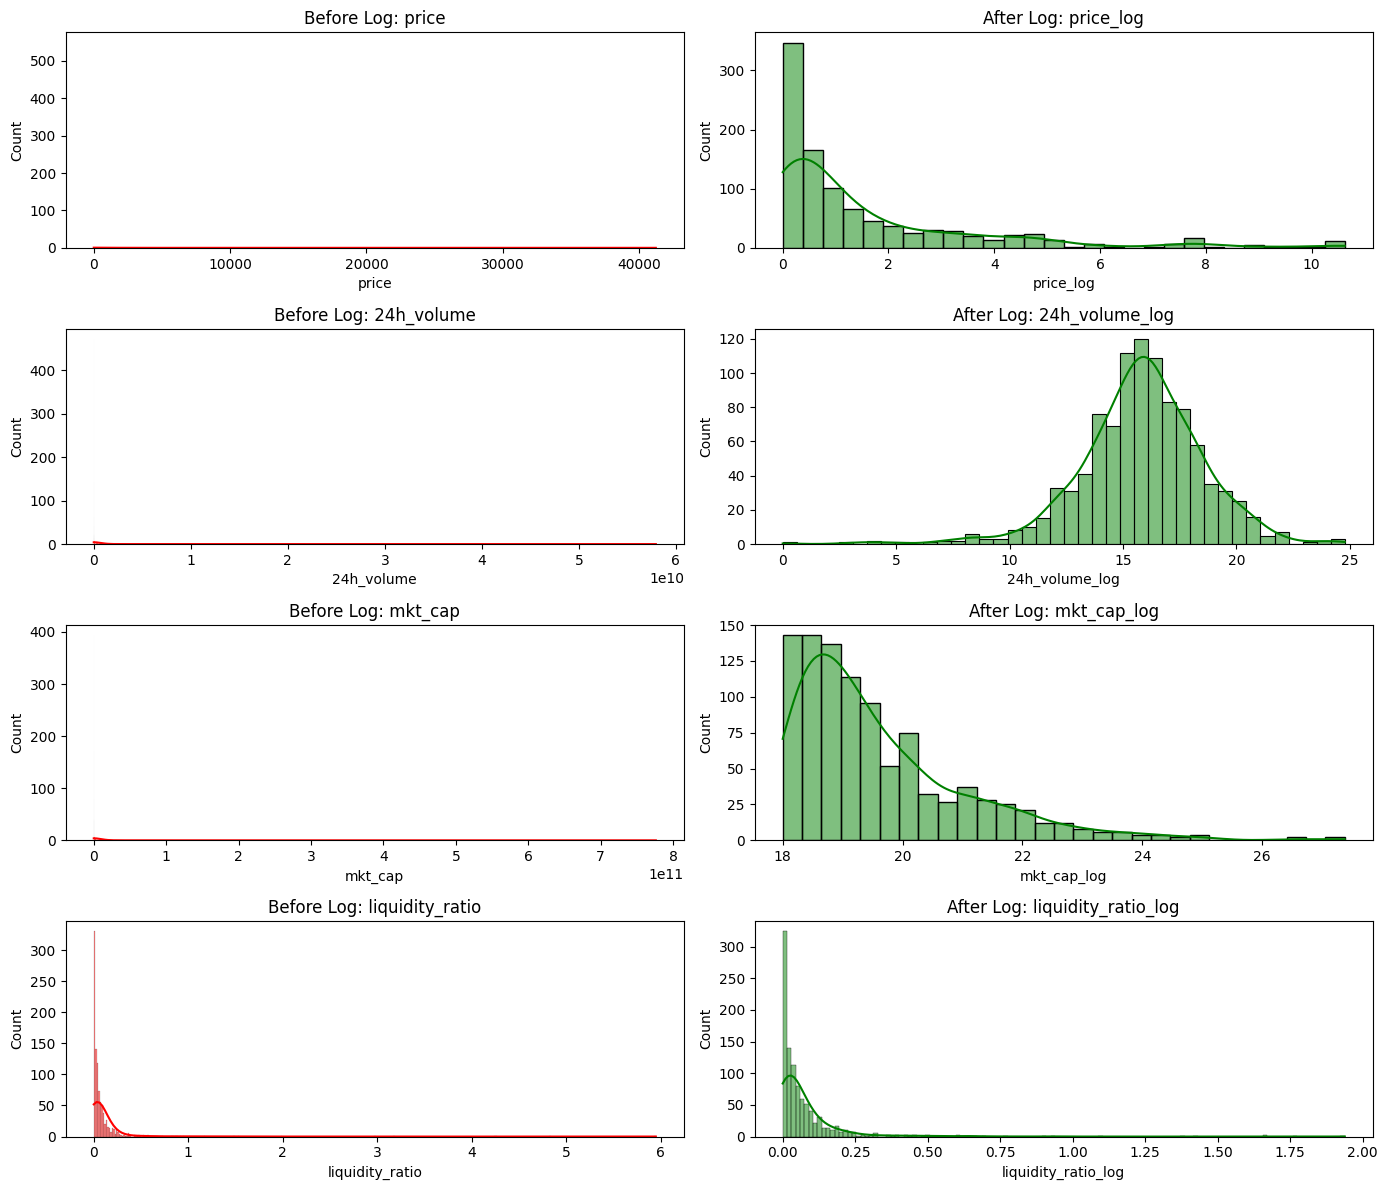

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

original_cols = ['price', '24h_volume', 'mkt_cap', 'liquidity_ratio']
log_cols = [f'{col}_log' for col in original_cols]

plt.figure(figsize=(14, 12))

for i, col in enumerate(original_cols):
    # Before log
    plt.subplot(4, 2, 2*i + 1)
    sns.histplot(df[col], kde=True, color='red')
    plt.title(f'Before Log: {col}')

    # After log
    plt.subplot(4, 2, 2*i + 2)
    sns.histplot(df[f'{col}_log'], kde=True, color='green')
    plt.title(f'After Log: {col}_log')

plt.tight_layout()
plt.show()


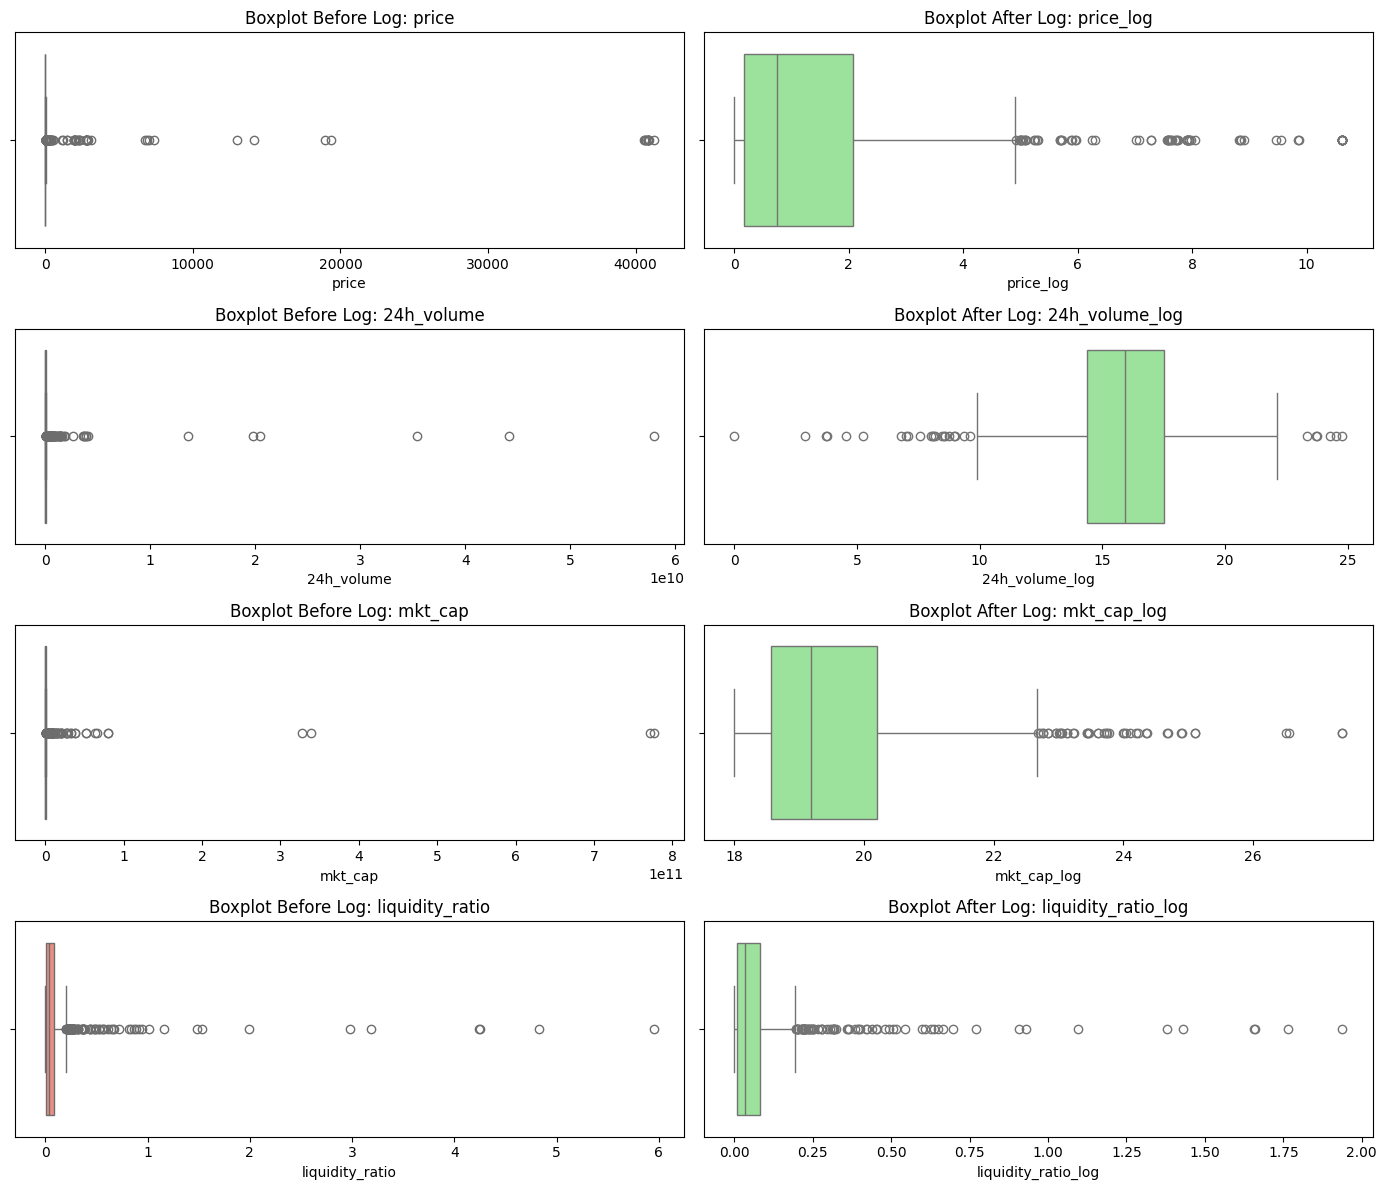

In [ ]:
plt.figure(figsize=(14, 12))

for i, col in enumerate(original_cols):
    # Before boxplot
    plt.subplot(4, 2, 2*i + 1)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot Before Log: {col}')

    # After boxplot
    plt.subplot(4, 2, 2*i + 2)
    sns.boxplot(x=df[f'{col}_log'], color='lightgreen')
    plt.title(f'Boxplot After Log: {col}_log')

plt.tight_layout()
plt.show()


📊 Distribution Comparison

Before Log:

Features like price, 24h_volume, mkt_cap, and liquidity_ratio were heavily right-skewed.

Distributions were concentrated near 0, with a long tail stretching toward high values.

After Log:

Distributions became more normalized and symmetric.

The data spread more evenly, especially for 24h_volume_log and mkt_cap_log.

📦 Boxplot Insights (Outliers)

Before Log:

Boxplots show many extreme outliers far from the IQR range (dots scattered far out).

The high-end values skewed the box and made median & IQR unbalanced.

After Log:

Outliers were visibly reduced and more compact.

The central tendency (box) became tighter and more symmetric.

Column	Outliers Before	Outliers After	Outcome

price	188 →	69	✅ Reduced

24h_volume	146	→ 28	✅ Reduced

mkt_cap	161 →	44	✅ Reduced

liquidity_ratio	86 →	76	✅ Reduced

this outlier count is fine

In [ ]:
def drop_outliers_iqr(df, cols):
    """Drop outliers using IQR for specified columns."""
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Columns to clean (log-transformed + raw percentage columns)
outlier_cols = ['price_log', '24h_volume_log', 'mkt_cap_log', 'liquidity_ratio_log', '1h', '24h', '7d']
df_cleaned = drop_outliers_iqr(df, outlier_cols)

# Check the shape after removing outliers
print("Original shape:", df.shape)
print("After dropping outliers:", df_cleaned.shape)


Original shape: (992, 11)
After dropping outliers: (641, 11)


In [ ]:
def drop_outliers_iqr(df, cols, threshold=3):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Columns to check
outlier_cols = ['price_log', '24h_volume_log', 'mkt_cap_log', 'liquidity_ratio_log', '1h', '24h', '7d']

# Drop less aggressively using threshold=3
df_less_dropped = drop_outliers_iqr(df, outlier_cols, threshold=3)

print("Original shape:", df.shape)
print("Shape after dropping with 3×IQR:", df_less_dropped.shape)


Original shape: (992, 11)
Shape after dropping with 3×IQR: (866, 11)


In [ ]:
# Rename the outlier-removed DataFrame for clarity
dforg = df_less_dropped.copy()


In [ ]:
def detect_outliers_iqr(df, cols, multiplier=1.5):
    """Detect and count outliers using IQR method."""
    outlier_counts = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Re-check outliers in cleaned data
outlier_cols = ['price_log', '24h_volume_log', 'mkt_cap_log', 'liquidity_ratio_log', '1h', '24h', '7d']
outliers_after = detect_outliers_iqr(dforg, outlier_cols, multiplier=1.5)

# Display results
print("Outlier count in `dforg` after applying 3×IQR:")
for col, count in outliers_after.items():
    print(f"{col}: {count}")


Outlier count in `dforg` after applying 3×IQR:
price_log: 71
24h_volume_log: 28
mkt_cap_log: 38
liquidity_ratio_log: 51
1h: 12
24h: 53
7d: 56


## Feature Engineering
### Feature Extraction

In [ ]:
# These are powerful liquidity-related features
dforg['volume_to_market_cap'] = dforg['24h_volume_log'] / dforg['mkt_cap_log']
dforg['price_to_liquidity'] = dforg['price_log'] / dforg['liquidity_ratio_log']


### Feature Selection

In [ ]:
dforg.corr()

,price,1h,24h,7d,24h_volume,mkt_cap,liquidity_ratio,price_log,24h_volume_log,mkt_cap_log,liquidity_ratio_log,volume_to_market_cap,price_to_liquidity
price,1.000000,0.002560,0.042871,0.043528,0.002572,0.023887,-0.028151,0.613304,-0.018198,0.006940,-0.029078,-0.030031,0.001813
1h,0.002560,1.000000,0.226213,0.143959,-0.002436,-0.004287,0.121463,0.060074,0.116022,0.026572,0.126318,0.131553,-0.028642
24h,0.042871,0.226213,1.000000,0.286712,0.010193,-0.000300,0.118258,0.098242,0.109094,0.062584,0.119342,0.099636,0.001392
7d,0.043528,0.143959,0.286712,1.000000,0.085357,0.060183,0.140270,0.071352,0.142247,0.144897,0.140181,0.094173,0.030923
24h_volume,0.002572,-0.002436,0.010193,0.085357,1.000000,0.803378,0.203906,0.104401,0.465527,0.574474,0.206243,0.221719,-0.011264
mkt_cap,0.023887,-0.004287,-0.000300,0.060183,0.803378,1.000000,0.020877,0.153107,0.430130,0.650715,0.024262,0.139658,0.012224
liquidity_ratio,-0.028151,0.121463,0.118258,0.140270,0.203906,0.020877,1.000000,-0.027672,0.573573,0.065046,0.999177,0.694881,-0.040085
price_log,0.613304,0.060074,0.098242,0.071352,0.104401,0.153107,-0.027672,1.000000,0.111120,0.209809,-0.026937,0.011839,0.074240
24h_volume_log,-0.018198,0.116022,0.109094,0.142247,0.465527,0.430130,0.573573,0.111120,1.000000,0.638278,0.588360,0.883196,-0.161410
mkt_cap_log,0.006940,0.026572,0.062584,0.144897,0.574474,0.650715,0.065046,0.209809,0.638278,1.000000,0.068407,0.206151,0.069952


In [ ]:
# Select numeric features but exclude the target
numeric_cols = dforg.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove the target column if present
target = 'liquidity_ratio_log'
if target in numeric_cols:
    numeric_cols.remove(target)

# Proceed with VIF
X = dforg[numeric_cols].dropna()

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)


                 Feature         VIF
8         24h_volume_log  433.091055
10  volume_to_market_cap  381.963800
9            mkt_cap_log  138.736338
6        liquidity_ratio    3.870399
5                mkt_cap    3.782320
4             24h_volume    3.421203
7              price_log    2.924116
1                     1h    1.733195
0                  price    1.715168
2                    24h    1.559117
3                     7d    1.141142
11    price_to_liquidity    1.129174


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define features (log-transformed, but no engineered ones)
raw_features = ['price_log', '1h', '24h', '7d', '24h_volume_log', 'mkt_cap_log']

# Subset the DataFrame
X_raw = dforg[raw_features].dropna()

# Create VIF dataframe
vif_data_raw = pd.DataFrame()
vif_data_raw["Feature"] = X_raw.columns
vif_data_raw["VIF"] = [variance_inflation_factor(X_raw.values, i) for i in range(X_raw.shape[1])]

# Optional: sort by VIF
vif_data_raw = vif_data_raw.sort_values(by="VIF", ascending=False)

# Display
print(vif_data_raw)



          Feature        VIF
4  24h_volume_log  72.356746
5     mkt_cap_log  72.218110
0       price_log   1.719471
1              1h   1.717383
2             24h   1.550954
3              7d   1.105194


In [ ]:
# Drop highly collinear original features
dforg = dforg.drop(columns=['24h_volume_log', 'mkt_cap_log'])


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define your updated feature list (after dropping collinear ones)
features_for_vif = [
    'price_log', '1h', '24h', '7d',
    'volume_to_market_cap',
    'price_to_liquidity'
]

# Subset the DataFrame
X_vif = dforg[features_for_vif].dropna()

# Create VIF DataFrame
vif_result = pd.DataFrame()
vif_result['Feature'] = X_vif.columns
vif_result['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort by VIF value
vif_result = vif_result.sort_values(by='VIF', ascending=False)

print(vif_result)


                Feature       VIF
4  volume_to_market_cap  2.480232
1                    1h  1.724743
0             price_log  1.687917
2                   24h  1.552714
3                    7d  1.100786
5    price_to_liquidity  1.010458


In [ ]:
# Add the target to the list of features temporarily
features_plus_target = [
    'price_log', '1h', '24h', '7d',
    'volume_to_market_cap', 'price_to_liquidity',
    'liquidity_ratio_log'  # Target
]

# Correlation matrix
correlation_matrix = dforg[features_plus_target].corr()

# Focus on correlations with the target only
target_corr = correlation_matrix['liquidity_ratio_log'].drop('liquidity_ratio_log')

# Sort by absolute correlation strength
target_corr = target_corr.abs().sort_values(ascending=False)

print("Correlation with target (liquidity_ratio_log):\n")
print(target_corr)


Correlation with target (liquidity_ratio_log):

volume_to_market_cap    0.711834
7d                      0.140181
1h                      0.126318
24h                     0.119342
price_to_liquidity      0.041878
price_log               0.026937
Name: liquidity_ratio_log, dtype: float64


In [ ]:
final_features = [
    'volume_to_market_cap',
    '1h',
    '24h',
    '7d']

The above are the selected features for our model after comparing the correlation and multicollinearity

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = dforg[final_features]
y = dforg['liquidity_ratio_log']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Shape check
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (692, 4)
X_test : (174, 4)
y_train: (692,)
y_test : (174,)


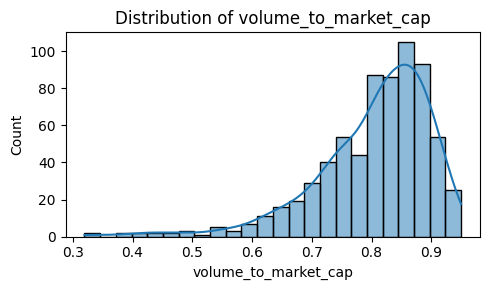

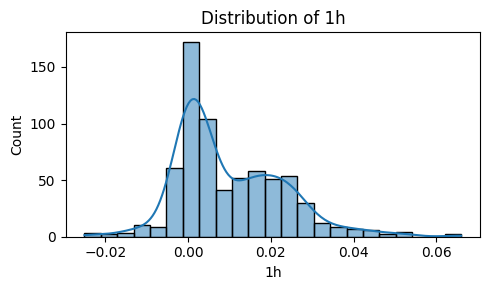

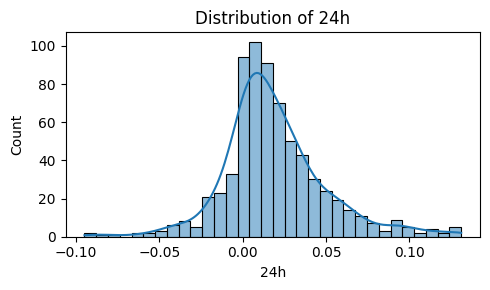

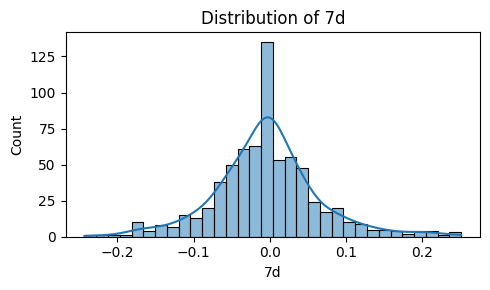

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in X_train.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


## Scaling the Features

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shape
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (692, 4)
X_test_scaled shape: (174, 4)


## Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5),
    'SVR': SVR(kernel='rbf')
}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"--- {name} ---")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE     : {mae:.4f}")
    print(f"RMSE    : {rmse:.4f}\n")


--- Linear Regression ---
R² Score: 0.5097
MAE     : 0.0294
RMSE    : 0.0407

--- Ridge Regression ---
R² Score: 0.5096
MAE     : 0.0294
RMSE    : 0.0407

--- Lasso Regression ---
R² Score: 0.4688
MAE     : 0.0301
RMSE    : 0.0424

--- ElasticNet ---
R² Score: 0.4965
MAE     : 0.0297
RMSE    : 0.0413

--- SVR ---
R² Score: -0.5797
MAE     : 0.0694
RMSE    : 0.0731



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Add KNN and GBR to the models dictionary
models['KNN Regressor'] = KNeighborsRegressor(n_neighbors=5)
models['Gradient Boosting'] = GradientBoostingRegressor(random_state=42)

# Evaluate all models again (including old ones + new ones)
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"--- {name} ---")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE     : {mae:.4f}")
    print(f"RMSE    : {rmse:.4f}\n")


--- Linear Regression ---
R² Score: 0.5097
MAE     : 0.0294
RMSE    : 0.0407

--- Ridge Regression ---
R² Score: 0.5096
MAE     : 0.0294
RMSE    : 0.0407

--- Lasso Regression ---
R² Score: 0.4688
MAE     : 0.0301
RMSE    : 0.0424

--- ElasticNet ---
R² Score: 0.4965
MAE     : 0.0297
RMSE    : 0.0413

--- SVR ---
R² Score: -0.5797
MAE     : 0.0694
RMSE    : 0.0731

--- KNN Regressor ---
R² Score: 0.8247
MAE     : 0.0149
RMSE    : 0.0244

--- Gradient Boosting ---
R² Score: 0.9591
MAE     : 0.0077
RMSE    : 0.0118



Till now the best model is Gradient Boosting with 95% accuracy.Now check for the overfitting

### Overfitting Check

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train the model again
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)

# Predictions
train_pred = gbr.predict(X_train_scaled)
test_pred = gbr.predict(X_test_scaled)

# Train scores
r2_train = r2_score(y_train, train_pred)
mae_train = mean_absolute_error(y_train, train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

# Test scores
r2_test = r2_score(y_test, test_pred)
mae_test = mean_absolute_error(y_test, test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))

# Print results
print("📊 Train Performance")
print(f"R² Score: {r2_train:.4f}")
print(f"MAE     : {mae_train:.4f}")
print(f"RMSE    : {rmse_train:.4f}\n")

print("📈 Test Performance")
print(f"R² Score: {r2_test:.4f}")
print(f"MAE     : {mae_test:.4f}")
print(f"RMSE    : {rmse_test:.4f}")


📊 Train Performance
R² Score: 0.9878
MAE     : 0.0042
RMSE    : 0.0064

📈 Test Performance
R² Score: 0.9591
MAE     : 0.0077
RMSE    : 0.0118


The Gradient Boosting Regressor demonstrated strong performance on both training and testing datasets, with R² scores of 0.9878 and 0.9591 respectively. The small difference between train and test metrics suggests no significant overfitting, indicating that the model generalizes well to unseen data.

### Hyperparameters

In [ ]:
# Print all hyperparameters used by the model
for param, value in gbr.get_params().items():
    print(f"{param}: {value}")


alpha: 0.9
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.1
loss: squared_error
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_iter_no_change: None
random_state: 42
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


Since the model is performing well ,so we dont have to consider hyperparamater tuning

## Actual v/s Predicted

In [ ]:
import pandas as pd

# Create a DataFrame to compare
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Show first few rows
print(comparison_df.head(10))


     Actual  Predicted
0  0.116158   0.103050
1  0.050442   0.052502
2  0.132532   0.127421
3  0.004264   0.004141
4  0.035832   0.047750
5  0.028695   0.027945
6  0.079428   0.089712
7  0.073103   0.059436
8  0.045970   0.039834
9  0.037072   0.028907


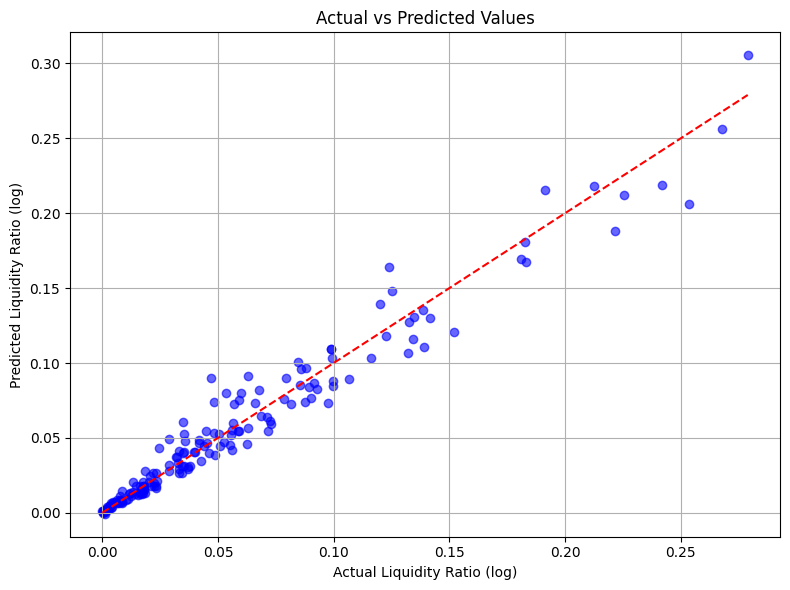

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Liquidity Ratio (log)')
plt.ylabel('Predicted Liquidity Ratio (log)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()


Scatter Plot: Actual vs Predicted Liquidity Ratio

✅ Points closely follow the y = x diagonal → Good predictions.

✅ Few minor deviations only.

Conclusion: This is a good model and it generalizes well.

In [ ]:
import numpy as np

# Convert back from log scale
comparison_df['Actual_real'] = np.expm1(comparison_df['Actual'])
comparison_df['Predicted_real'] = np.expm1(comparison_df['Predicted'])

# Display top rows
print(comparison_df[['Actual_real', 'Predicted_real']].head(10))


   Actual_real  Predicted_real
0     0.123173        0.108547
1     0.051736        0.053905
2     0.141715        0.135895
3     0.004273        0.004149
4     0.036482        0.048908
5     0.029111        0.028339
6     0.082668        0.093859
7     0.075841        0.061238
8     0.047043        0.040638
9     0.037768        0.029329


## Classfying The prediction to 'High','Medium','Low'

Since the prediction is performing well,We can classify the prediction output to 'High','Medium','Low' for better interpretability by the users

In [ ]:
def classify_liquidity(value):
    if value < 0.05:
        return 'Low'
    elif value < 0.15:
        return 'Medium'
    else:
        return 'High'
# Apply classification to real liquidity values
comparison_df['Actual_Class'] = comparison_df['Actual_real'].apply(classify_liquidity)
comparison_df['Predicted_Class'] = comparison_df['Predicted_real'].apply(classify_liquidity)

# Preview results
print(comparison_df[['Actual_real', 'Predicted_real', 'Actual_Class', 'Predicted_Class']].head(10))


   Actual_real  Predicted_real Actual_Class Predicted_Class
0     0.123173        0.108547       Medium          Medium
1     0.051736        0.053905       Medium          Medium
2     0.141715        0.135895       Medium          Medium
3     0.004273        0.004149          Low             Low
4     0.036482        0.048908          Low             Low
5     0.029111        0.028339          Low             Low
6     0.082668        0.093859       Medium          Medium
7     0.075841        0.061238       Medium          Medium
8     0.047043        0.040638          Low             Low
9     0.037768        0.029329          Low             Low


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(comparison_df['Actual_Class'], comparison_df['Predicted_Class']))


              precision    recall  f1-score   support

        High       0.85      0.85      0.85        13
         Low       0.95      0.93      0.94       107
      Medium       0.84      0.87      0.85        54

    accuracy                           0.91       174
   macro avg       0.88      0.88      0.88       174
weighted avg       0.91      0.91      0.91       174



## Saving The Model

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'gradient_boost_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save feature list
features = ['volume_to_market_cap', '1h', '24h', '7d']
joblib.dump(features, 'features.pkl')


['features.pkl']